In [3]:
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [5]:
outage = pd.read_csv('/Users/chirathwije/Desktop/Projects Datasets/BB outage Reports/BB Outage Report Source.csv')

In [6]:
outage.head()

,id,bb_type,bb_name,city,area_code,log_report_type,priority,outage_duration,volume
0,8011,8,ADSL 1,Lagos,1,68,Medium,0,7
1,16949,8,ADSL 1,Lagos,1,80,Medium,0,1
2,16949,8,ADSL 1,Lagos,1,201,Medium,0,1
3,4703,8,ADSL 1,Lagos,1,159,Low,2,1
4,4703,8,ADSL 1,Lagos,1,201,Low,2,5


In [7]:
outage.describe()

,id,bb_type,area_code,log_report_type,outage_duration,volume
count,8508.000000,8508.000000,8508.000000,8508.000000,8508.000000,8508.000000
mean,9125.328279,4.226023,475.347555,217.565585,0.455101,7.038669
std,5289.954576,2.859640,414.290321,87.883978,0.667104,21.053108
min,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,4623.000000,2.000000,128.000000,170.000000,0.000000,1.000000
50%,9144.000000,2.000000,270.000000,232.000000,0.000000,2.000000
75%,13491.500000,8.000000,1024.000000,307.000000,1.000000,5.000000
max,18550.000000,10.000000,1126.000000,384.000000,2.000000,636.000000


In [11]:
outage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               8508 non-null   int64 
 1   bb_type          8508 non-null   int64 
 2   bb_name          8508 non-null   object
 3   city             8508 non-null   object
 4   area_code        8508 non-null   int64 
 5   log_report_type  8508 non-null   int64 
 6   priority         8508 non-null   object
 7   outage_duration  8508 non-null   int64 
 8   volume           8508 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 598.3+ KB


## City-Specific Analysis
#### Objective: Identify cities with the highest frequency of outages.

In [14]:
city_specific_analysis = outage.groupby('city').agg(
    total_outages=('id','count'),
    avg_volume = ('volume','mean')
).reset_index()
city_sorted=city_specific_analysis.sort_values("total_outages",ascending=False)
city_sorted.head()

,city,total_outages,avg_volume
164,Munich,420,5.800000
149,Mashhad,299,4.311037
21,Basra,283,3.173145
250,Touba,258,20.856589
170,Naples,241,36.514523


## Broadband Type Comparison
#### Objective: Determine which broadband types are most prone to severe outages.

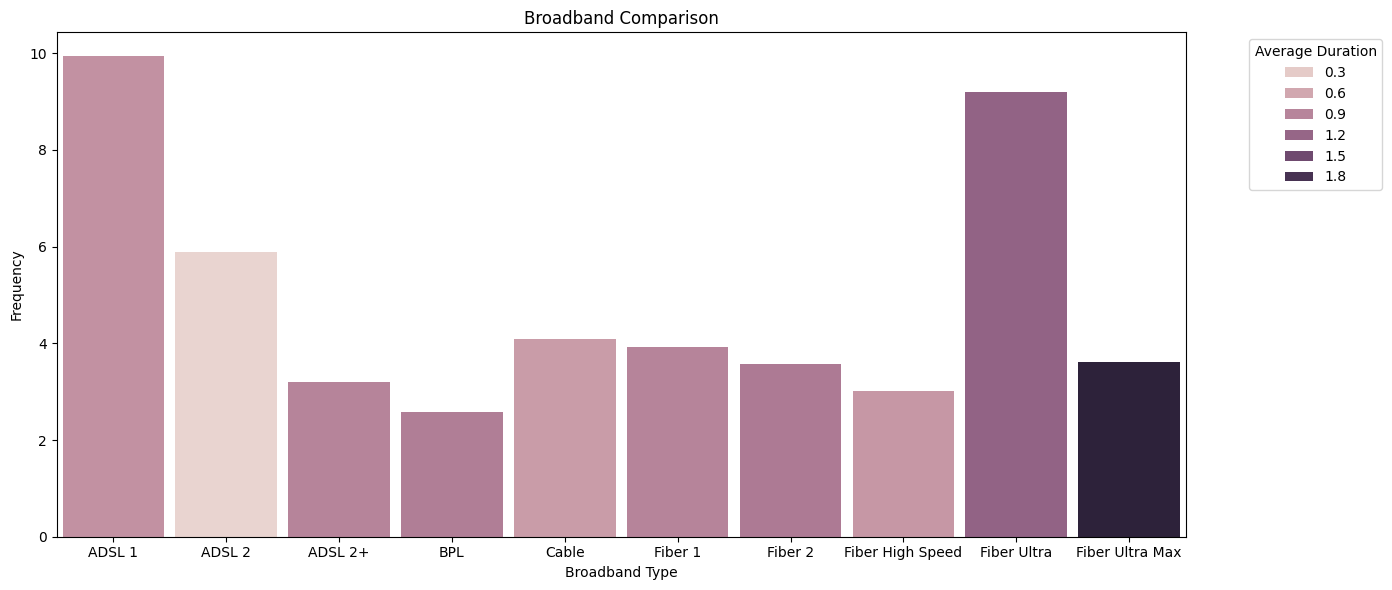

In [53]:
bb_type= outage.groupby('bb_name').agg(
    avg_duration=('outage_duration','mean'),
    avg_volume = ('volume','mean')
).reset_index ()

plt.figure(figsize=(14,6))
sns.barplot(x='bb_name', 
            y='avg_volume', 
            hue='avg_duration',
            width=0.9,
            data=bb_type
)
plt.title('Broadband Comparison')
plt.xlabel('Broadband Type')
plt.ylabel('Frequency')
plt.legend(title='Average Duration',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### The barplot will show different broadband types, allowing for direct comparison between different technologies. Broadband types with lower bars and lighter colors would represent more reliable services (fewer and shorter outages)

## Outage Severity Trends
#### Objective:- Identify how outage priorities (Low/Medium/Critical/Severe) distribute across broadband types?

In [81]:
severity= outage.groupby(['priority','bb_name'])['volume'].mean().reset_index()
pivot_df = severity.pivot(index='bb_name', columns='priority', values='volume').fillna(0)

In [83]:
pivot_df.head()

priority,Critical,High,Low,Medium,Severe
bb_name,,,,,
ADSL 1,3.608696,0.0,11.081602,6.825465,0.0
ADSL 2,1.256098,1.0,2.368801,7.220254,0.0
ADSL 2+,0.000000,0.0,3.192453,0.000000,0.0
BPL,0.000000,0.0,2.941176,0.000000,1.0
Cable,2.444444,0.0,4.984127,1.800000,0.0


In [85]:
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total', ascending=False).drop('Total', axis=1)

<Figure size 1200x600 with 0 Axes>

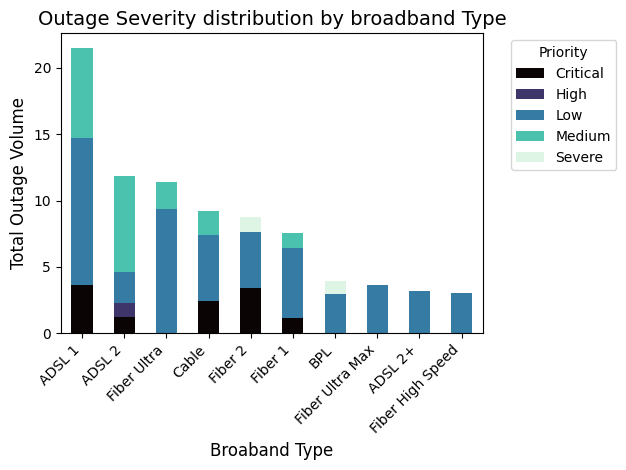

In [87]:
plt.figure(figsize=(12,6))
pivot_df.plot(kind='bar',stacked=True,colormap='mako')
plt.title('Outage Severity distribution by broadband Type',fontsize=14)
plt.xlabel('Broaband Type',fontsize=12)
plt.ylabel('Total Outage Volume',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### The above visualization shows broadband types like ADSL1 have the highest average number of cases being distributed among various priorities, while showcasing patterns of the outage distribution that might suggest where service improvements are most needed.